<a href="https://colab.research.google.com/github/MEHALSAKTHI/US-Senate-Analysis/blob/main/US_Senate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json                  

from urllib.parse import urlencode

import requests               
from bs4 import BeautifulSoup 

import pandas as pd
import re                     

from datetime import datetime
import seaborn as sns


import matplotlib.pyplot as plt

In [ ]:
data_url = 'https://www.senate.gov/legislative/LIS/roll_call_votes/vote1171/vote_117_1_00088.htm'

In [ ]:
response = requests.get(data_url)

In [ ]:
soup = BeautifulSoup(response.content,'html.parser')

In [ ]:
# Extract the data 
extract1 = soup.find('div',attrs={'class':'newspaperDisplay_3column'})
extract2 = extract1.find_all('span',attrs={'class':'contenttext'})
extract_final = [item.text for item in extract2]
extract_final=extract_final[0].split('\n')

In [ ]:
extract_final[0]

'Baldwin (D-WI), Nay'

In [ ]:

df = pd.DataFrame(extract_final)
df.columns = ['Names']
df[['Names','Voted']]=df['Names'].str.split(',',expand=True)
df['Voted']=df['Voted'].str.strip(' ')

df = df.loc[:99,:]            
df[['Names','Type']]=df['Names'].str.split('(',expand=True)
df['Type']=df['Type'].str.rstrip(')')

df[['Type','State']] = df['Type'].str.split('-',expand=True) 



In [ ]:
democrat_match = '^D'
republicans_match = '^R'

In [ ]:

q1_df =df[df['Type'].str.match(pat=democrat_match)]
q1_df['Voted'].value_counts()


Nay    48
Name: Voted, dtype: int64

In [ ]:


q2_df =df[df['Type'].str.match(pat=republicans_match)]
q2_df['Voted'].value_counts()

Yea           47
Not Voting     2
Nay            1
Name: Voted, dtype: int64

In [ ]:

# Q3 What's the total number of Yea votes from all senators whose name starts with "B"?

names_B_match = '^B'
q3_df =df[df['Names'].str.match(pat=names_B_match)]
q3_df['Voted'].value_counts()

Yea    6
Nay    5
Name: Voted, dtype: int64

In [ ]:
#Q4 How many states voted all Yay?
q4_dict = df.groupby('State')['Voted'].apply(set).to_dict() # group by states as key and Voted as values
# print(q4_dict)

count =0 
for key,value in q4_dict.items():
    if 'Yea' in value and len(value)==1:
        #print(key,value)                           # uncomment to see the states
        count += 1
print(count)

21


In [ ]:
#Q5 How many states had at least 1 non-voting senator?
q5_df = df[df['Voted']!='Yea']
len(q5_df['State'].unique())



29

In [ ]:
#Q6 How many states have both Republican senators?


q6_dict = df.groupby('State')['Type'].apply(set).to_dict() # group by states as key and type as values
# print(q6_dict)

count =0 
for key,value in q6_dict.items():
    if 'R' in value and len(value)==1:
        # print(key,value)                            uncomment to see the states
        count += 1
print(count)


22


In [ ]:
#Q7 How many states have both Republican and Democrat senators?

q7_dict = df.groupby('State')['Type'].apply(set).to_dict() # group by states as key and type as values
# print(q7_dict)


count =0 
for key,value in q7_dict.items():
    if 'R' in value and 'D' in value:
        print(key,value)                         #uncomment to see the states
        count += 1
print(count)


MT {'D', 'R'}
OH {'D', 'R'}
PA {'D', 'R'}
WI {'D', 'R'}
WV {'D', 'R'}
5


In [ ]:
#Q8 How many Senators have their names starting with W?
names_W_match = '^W'
q8_df =df[df['Names'].str.match(pat=names_W_match)]

q8_df.shape[0]

6

In [ ]:
#Q9 What is the votes ratio of Democrats' major decision to Republicans' major decision ?

D_major_dict = df[df['Type']=='D']['Voted'].value_counts()
R_major_dict = df[df['Type']=='R']['Voted'].value_counts()

D_major=D_major_dict.values[0]   # get the major votes number
R_major=R_major_dict.values[0]

# Ratio
print(D_major/R_major)

1.0212765957446808


In [ ]:
#Q10 What is the highest absolute difference in percentage between yea and nay senators among the different parties



In [ ]:
# Q11 How many Democrats voted Yea?

q11_df = df[df['Voted']=='Yea']
q11_df['Type'].value_counts()

R    47
Name: Type, dtype: int64

In [ ]:
#Q12 How many states voted all Nay?

q12_dict = df.groupby('State')['Voted'].apply(set).to_dict() # group by states as key and Voted as values
# print(q12_dict)

count =0 
for key,value in q12_dict.items():
    if 'Nay' in value and len(value)==1:
        # print(key,value)                            uncomment to see the states
        count += 1
print(count)

22


In [ ]:
#Q13 How many states have both Democrat senators?

q13_dict = df.groupby('State')['Type'].apply(set).to_dict() # group by states as key and type as values
# print(q6_dict)

count =0 
for key,value in q13_dict.items():
    if 'D' in value and len(value)==1:
        # print(key,value)                            uncomment to see the states
        count += 1
print(count)


21


In [ ]:
#Q14 How many senators did not vote?

q14_df = df[df['Voted']=='Nay']
q14_df.shape

(51, 4)

In [ ]:
#Q15 How many states had at least 1 senator not voted?

q15_dict = df.groupby('State')['Voted'].apply(set).to_dict() # group by states as key and Voted as values
# print(q12_dict)

count =0 
for key,value in q15_dict.items():
    if 'Nay' in value :
        # print(key,value)                            uncomment to see the states
        count += 1
print(count)

29


In [ ]:
#Q16 Ratio of number of rows to the number of columns in your dataset?

q16_ratio = df.shape[0]/df.shape[1]
print(q16_ratio)

25.0


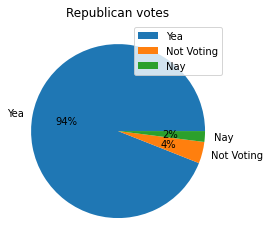

In [ ]:
#Q18 Pie chart of Republican votes ?

q18_df = df[df['Type']=='R'][['Voted']]
q18_df=q18_df.value_counts().rename_axis('Voted').to_frame('counts')
q18_df.reset_index(inplace=True)

# q18_df.loc[len(q18_df.index)] = ['Nea',0]             # For me it was required 



plt.pie(data=q18_df,x='counts',labels=q18_df['Voted'],autopct='%.0f%%')

# plt.legend(['R:Republican','D:Democrats','RD:RepublicansDemocrats+Democrats'],loc = 'upper left')
plt.legend()
plt.title('Republican votes')
plt.savefig("pie_chart1.png",transparent = True,
            facecolor ="w")




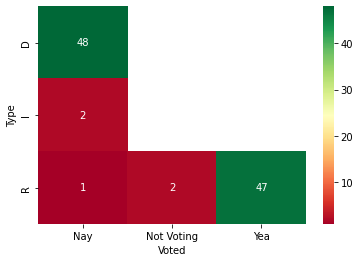

In [ ]:
#Q19  Plot the crosstab of Party and Yea/Nay as a heat map with the values


pivot1 = df.pivot_table(df,index='Type',columns='Voted',aggfunc='size')

# Uncomment below if you don't have any 'Nay' Values in your data
# pivot1['Nay'] = 0 

heatmap = sns.heatmap(pivot1,cmap="RdYlGn",annot=True)
plt.xlabel("Voted")
plt.savefig("crosstab_heatmap.png",transparent = True,
            facecolor ="w")
plt.show()

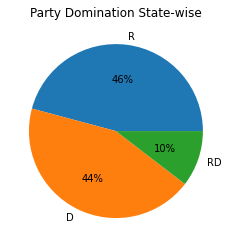

In [ ]:
#Q20
q20_dict = df.groupby('State')['Type'].apply(set).to_dict() # group by states as key and type as values
# print(q7_dict)


r_count = 0
d_count = 0 
rd_count = 0
for key,value in q7_dict.items():
    if 'R' in value and 'D' in value:
        # print(key,value)                         #uncomment to see the states
        rd_count += 1
    elif 'R' in value and len(value)==1:
        r_count += 1
    elif 'D' in value and len(value)==1:
        d_count += 1


# print(r_count,d_count,rd_count)
q20_df = pd.DataFrame({'Parties':['R','D','RD'], 'Count of States':[r_count,d_count,rd_count]})



# plotting
plt.pie(data=q20_df,x='Count of States',labels=q20_df['Parties'],autopct='%.0f%%')

# If you want numbers instead of % 
# plt.pie(data=q20_df,x='Count of States',labels=q20_df['Parties'],autopct=lambda p: '{:.0f}'.format(p * q20_df['Count of States'].sum() / 100))

plt.title('Party Domination State-wise')
plt.savefig("pie_chart2.png",transparent = True,
            facecolor ="w")

